# Data Mining II - Task II - Cory Wilson

In [25]:
### Initial imports and dataframe creation
### Importing required packages
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.pipeline import Pipeline
pd.options.display.float_format = '{:.5f}'.format
pd.options.display.max_columns = None

### Creating initial data set from the Churn CSV
data = pd.read_csv('churn_clean.csv')

## Part I

### A. 1.

Can features be reduced in such a way that algorithms run more efficiently and allow for more plotting options?

### A. 2.

The goal of this analysis is to perform dimensional reduction on the data set. This will allow algorithms to run more quickly and efficiently while also reducing the number of features in the data set. This will allow for better options with plotting as well.

## Part II

### B. 1.

PCA starts by converting a data set into a matrix. Then, the process of finding the mean of that matrix occurs. A covariance matrix is created for the whole data set. This matrix is similar to what we see in section D. 2. Once the covariance matrix is formed the process of finding eigenvectors and eigenvalues beings. While the math behind finding eigenvectors and eigenvalues is somewhat complex, the process is there to simply find the variance expressed by each eigenvector. PCA through SkLearn returns a variety of information when run on a data set, the most important information returned are the principal components themselves. (Alto, 2019)

### B. 2.

One assumption that PCA makes about the data is that it must be linear in nature. This means that the features must have linear relationships amongst themselves. With this data set, previous analysis has shown that this is the case. (Vadapalli, 2020)

## Part III

### C. 1.

Continuous variables that will be included:
- Children 
- Age 
- Income 
- Outage_sec_perweek 
- Email 
- Contacts 
- Yearly_equip_failure 
- Tenure 
- MonthlyCharge 
- Bandwidth_GB_Year 

### C. 2.

In [3]:
### Dropping columns that aren't required for clustering
clean_data = data.drop(columns=['CaseOrder','Customer_id',
                                'Interaction','Churn','UID','Population',
                                'Zip','Job','City','Lat','Lng','State',
                                'County','TimeZone','item1','item2',
                                'item3','item4','item5','item6','item7',
                                'item8','Area','Marital','Gender',
                                'Techie','Contract','Port_modem',
                                'Tablet','InternetService','Phone',
                                'Multiple','OnlineSecurity',
                                'OnlineBackup','DeviceProtection',
                                'TechSupport','StreamingTV',
                                'StreamingMovies','PaperlessBilling',
                                'PaymentMethod'])

### Creating a scaler object and scaling the data to make it more uniformed
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clean_data)

### Saving a copy of the cleaned data set.
clean_data.to_csv('D212 Task 2 Clean Data.csv')

## Part IV

### D. 1.

The code below presents a covariance matrix and heat plot of the matrix with all principle components.

[[ 1.00010001 -0.02973451  0.00994335  0.00191611  0.00447925 -0.02077811
   0.00732132 -0.00509183 -0.00978238  0.02558738]
 [-0.02973451  1.00010001 -0.00409101 -0.00799559  0.00158808  0.01506913
   0.00857821  0.01698097  0.01072958 -0.01472512]
 [ 0.00994335 -0.00409101  1.00010001 -0.00989    -0.00926842  0.00123332
   0.00542382  0.00211458 -0.00301427  0.00367392]
 [ 0.00191611 -0.00799559 -0.00989     1.00010001  0.0040835   0.01516813
   0.00298848  0.00288075  0.02044865  0.00412502]
 [ 0.00447925  0.00158808 -0.00926842  0.0040835   1.00010001  0.00304067
  -0.01635598 -0.01446932  0.00199675 -0.01458061]
 [-0.02077811  0.01506913  0.00123332  0.01516813  0.00304067  1.00010001
  -0.00603285  0.00282037  0.00425907  0.00329905]
 [ 0.00732132  0.00857821  0.00542382  0.00298848 -0.01635598 -0.00603285
   1.00010001  0.01243615 -0.00717299  0.0120349 ]
 [-0.00509183  0.01698097  0.00211458  0.00288075 -0.01446932  0.00282037
   0.01243615  1.00010001 -0.00333714  0.99159435]


<AxesSubplot:>

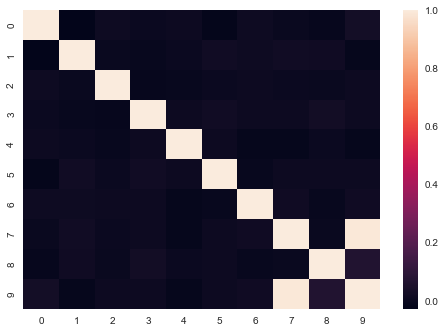

In [20]:
features = scaled_data.T
matrix = np.cov(features)
print(matrix)
sns.heatmap(matrix)

### D. 2.

The two code blocks below run the PCA on the scaled data and display an elbow plot. To be able to retain at least 80% of the variance, 7 principal components will work. Additionally, to retain at least 90% of the data 8 components should be used.

In [21]:
pca = PCA()
ran_pca = pca.fit(scaled_data)

pca_df = pd.DataFrame(ran_pca.components_)
pca_df

,0,1,2,3,4,5,6,7,8,9
0,0.01413,0.00171,0.00436,0.00581,-0.02078,0.00417,0.01757,0.70542,0.04042,0.70692
1,-0.55945,0.48012,-0.22341,0.21212,0.10722,0.45907,-0.14319,0.00188,0.34465,-0.00792
2,-0.28548,0.42134,0.26603,-0.47857,-0.44067,0.01254,0.39556,0.02099,-0.29922,-0.01971
3,0.14309,-0.09000,0.16996,0.57983,-0.45064,0.10750,0.53096,-0.04167,0.32848,-0.01273
4,0.03058,-0.15891,0.78651,-0.02731,-0.00359,0.46564,-0.37010,-0.00458,0.02493,0.00463
5,-0.05898,0.12062,0.21063,-0.24240,-0.16014,-0.54790,-0.23092,-0.03721,0.70590,0.00262
6,0.28529,0.40773,0.29769,-0.00486,0.68576,-0.04940,0.42071,-0.00445,0.11830,-0.00082
7,0.64723,0.20822,-0.30150,-0.36740,-0.22794,0.43944,-0.07758,-0.02974,0.24472,-0.00025
8,-0.28226,-0.57788,-0.08906,-0.44186,0.20719,0.25487,0.40925,-0.02222,0.32751,0.00908
9,-0.02159,0.02237,-0.00094,0.00028,0.00025,-0.00094,-0.00010,-0.70526,-0.04575,0.70678


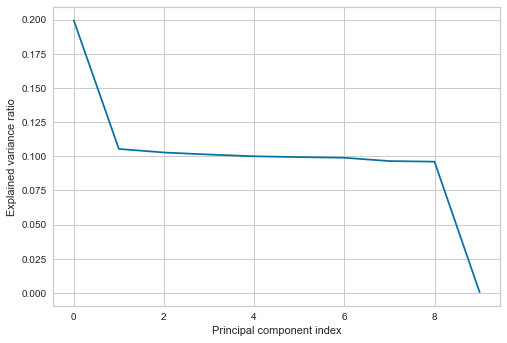

In [22]:
# Plot the explained variance ratio
plt.plot(ran_pca.explained_variance_ratio_)

plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.show()

### D. 3.

The array below shows the variance of each individual component. The first component explains 0.1994 or 19.94% of the variance.

In [23]:
ran_pca.explained_variance_ratio_

array([0.19941328, 0.10532287, 0.10273989, 0.10124756, 0.09996907,
       0.09937176, 0.09889587, 0.09646805, 0.09602493, 0.00054672])

### D. 4.

The array below shows the cumulative sum of all principal components. This array starts with PC1 and adds each additional PC. These 8 components explain .903 or 90.3% of the variance.

In [24]:
ran_pca.explained_variance_ratio_.cumsum()

array([0.19941328, 0.30473615, 0.40747604, 0.5087236 , 0.60869267,
       0.70806443, 0.8069603 , 0.90342836, 0.99945328, 1.        ])

### D. 5.

The main takeaway from this analysis is that number of features can be slightly reduced while still retaining a large amount of the variance. One item of note is that only continuous variables were used, leading me to question if some of the categorical variables in addition to these would allow for even more of the variance to be retained with a smaller number of PCs.

## Part V

### E. 1.

## References
Vadapalli, P. (2020, November 12). PCA in Machine Learning: Assumptions, steps to apply &amp; applications. upGrad blog. Retrieved October 13, 2021, from https://www.upgrad.com/blog/pca-in-machine-learning/#Assumptions_in_PCA.
    
Alto, V. (2019, July 13). PCA: Eigenvectors and eigenvalues. Medium. Retrieved October 18, 2021, from https://towardsdatascience.com/pca-eigenvectors-and-eigenvalues-1f968bc6777a. 